<Figure size 432x288 with 0 Axes>

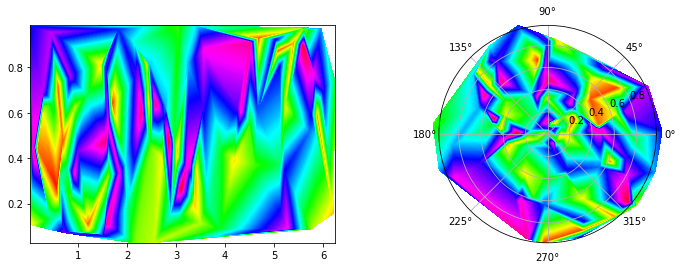

In [1]:
## polar plot test
import numpy as np
from matplotlib import pyplot as plt

fig = plt.figure()

x = np.random.random(100)*2*np.pi  # theta
y = np.random.random(100)  # r
value = np.random.random(100)

plt.tricontourf


import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 4))

ax = fig.add_subplot(121)
ax.tricontourf(x, y, value, levels=256, cmap='hsv')

ax = fig.add_subplot(122)
theta = y*np.sin(x)
rad = y*np.cos(x)
ax.tricontourf(rad, theta, value, levels=256, cmap='hsv')
ax.set_aspect('equal')
ax.axis('off')

ax_polar = fig.add_axes(ax.get_position(), polar=True)
ax_polar.set_facecolor('none') # make transparent
ax_polar.set_ylim(0, rad.max())

plt.show()

TypeError: Dimensions of C (20, 20) are incompatible with X (20) and/or Y (2); see help(pcolormesh)

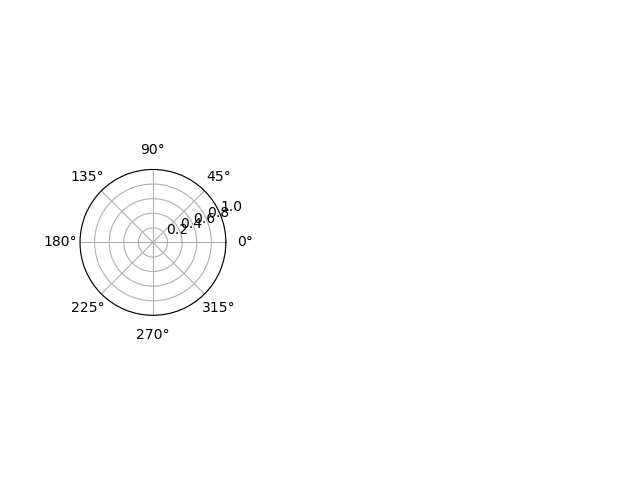

In [17]:
## polar plot test
import numpy as np
from matplotlib import pyplot as plt

fig = plt.figure()
# ax = fig.add_subplot(111, projection = 'polar')


# plt.subplot(111,projection='polar')
theta1 = np.arange(20)*2*np.pi/20.
theta2 = np.arange(50)*2*np.pi/50.

 #plt.plot(theta1,0.25*np.ones(20),'m') 
# plt.plot(theta2, 0.65*np.ones(50), 'm')

data = np.ones((20,1))*10

t_in = np.concatenate([theta1, theta1])
y = np.concatenate([np.zeros(20), np.ones(20)])

#Create a polar projection
ax1 = fig.add_subplot(131, projection='polar')
# pc1 = ax1.pcolormesh(angles,pupil_r_range,data_x.T,\
pc1 = ax1.pcolormesh([ theta1, theta1], [np.zeros(20), np.ones(20)], np.ones((20,20))*10,\
        shading='auto')
        
# pc2 = ax1.pcolormesh(theta2, 1, np.ones(50)*1,\
#     shading='auto')


fig.colorbar(pc1, ax=ax1, fraction=0.045, pad=0.18)
plt.show()


In [ ]:
#### working out this theta -> sine theta problem
import numpy as np
NA = 0.75
ray_count = 2000

N = ray_count*2
r_c = np.arccos(1-2/N)
delta_ideal = (4*np.pi/N)**0.5
n_ideal = (np.pi - 2*r_c)/delta_ideal
n_fitting = np.max([1, int(np.round(n_ideal))])
delta_fitting = delta_ideal*n_ideal/n_fitting
A_i = [2*np.pi*(np.cos(r_c + (i-2)*delta_fitting) - \
    np.cos(r_c + (i - 1)*delta_fitting)) for i in range(2,n_fitting+2)]
n_cells_ideal = N*np.array(A_i)/(4*np.pi)
n_cells_fitting = np.zeros_like(n_cells_ideal)

a_j = 0
# j= {2, ... n+1}, actual range is 1 to n+2 including caps/poles
for j in range(n_fitting):
    n_cells_fitting[j] = np.round(n_cells_ideal[j] + a_j)
    a_j = np.sum(n_cells_ideal[0:j+1]-n_cells_fitting[0:j+1])

# add the first pole point (y1 in literature)
n_cells_fitting_w_cap = np.append(1, n_cells_fitting)

thetas = \
    [np.arccos(1 - (2/N)*np.sum(n_cells_fitting_w_cap[0:j+1])) for j in range(0, n_fitting+1)]
thetas_with_caps = np.concatenate(([0], thetas, [np.pi]))
n_cells_with_caps = np.asarray(np.concatenate((n_cells_fitting_w_cap, [1])), dtype=int)
n_rings = len(thetas_with_caps)
# print("thetas with caps", thetas_with_caps)

cap_area = np.pi * r_c*r_c  # approximate as flat surface
# starts from j=1 not j=0 (cap)
ring_areas = 2*np.pi*np.sin(thetas)*delta_fitting
areas = np.concatenate(([cap_area], ring_areas))



max_angle = np.arcsin(NA)
n_rings = 50
theta_range = np.linspace(0, max_angle, n_rings)
theta_range = list(theta_range)
n_cells = np.asarray(np.round(np.linspace(1, 2*n_rings, n_rings)), dtype=int)
theta_k = []
phi_k = []
print([theta_range[1]]*3)
for i, n in enumerate(n_cells):
    theta_k += [theta_range[i]]*n
    phi_k += list(np.linspace(0, np.pi*2, n))

# hists

plt.plot(np.sin(theta_k))
plt.show()
plt.hist(np.sin(theta_k), 30)
plt.show()

sintheta = np.sin(theta_k)
mask = (sintheta > 0.625)*(sintheta < 0.65)
print(np.sum(mask))

mask = (sintheta > 0.65)*(sintheta < 0.675)
print(np.sum(mask))

Generating 1 dipoles
Dipole: theta=0.0, phi_d=0.0
manual (cap method) area sum 1.7960933811899618
expected area sum 1.7960934897300826
Tracing with 2 CPU processes
Flat pupil
Time elapsed in parallel section (time.time()) 2.992827s
lengths phi, rad, data 1532 1532 1532
Time elapsed in bin section (time.time()) 0.025886s
[0.00116778 0.00121006 0.00121006 ... 0.00121006 0.00121006 0.00121006]
total area of elements (curved) 1.85376666953408
total_area_flat 1.8537606886078568
Time elapsed in addition 0.703125s
----------------------------------
----------------------------------
manual (cap method) area sum 1.7960933811899618
expected area sum 1.7960934897300826
Tracing with 2 CPU processes
Flat pupil
Time elapsed in parallel section (time.time()) 2.974905s
lengths phi, rad, data 1532 1532 1532
Time elapsed in bin section (time.time()) 0.016926s
[0.00116778 0.00121006 0.00121006 ... 0.00121006 0.00121006 0.00121006]
total area of elements (curved) 1.85376666953408
total_area_flat 1.853760

NameError: name 'plt' is not defined

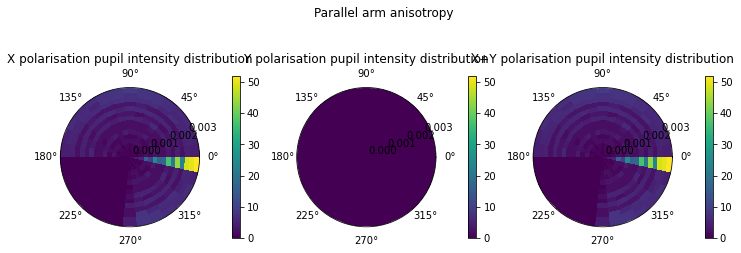

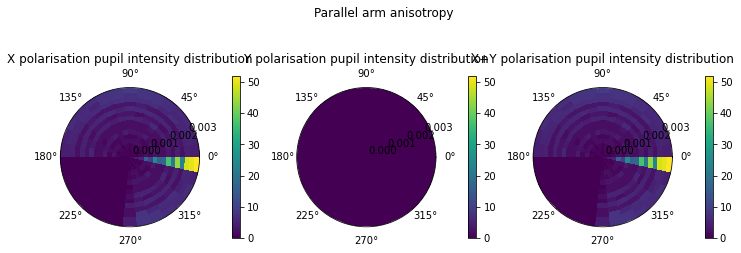

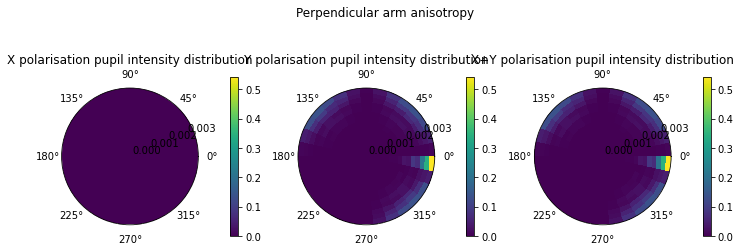

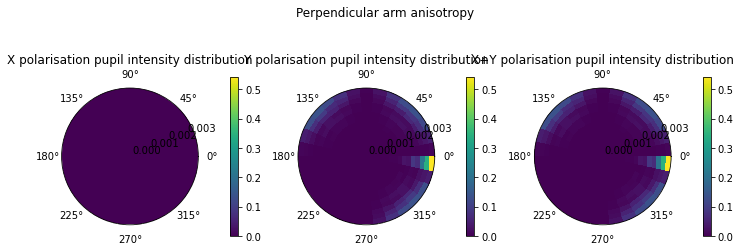

In [1]:
import optical_systems
import dipole_source
import time
import numpy as np
import ipympl
from matplotlib import pyplot as plt
%matplotlib widget
%matplotlib inline

collection_NA = 0.95
# collection_NA = 0.0001
collection_f = 0.005
# collection_f = 0.15
excitation_polarisation = (0,0)

method='uniform_phi_inbetween'

r_theory = []
r = []
NAs = np.linspace(0.01, 0.99,10)
NAs = [0.01, 0.1, 0.2, 0.4, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99]
NAs = [0.7, 0.8, 0.9, 0.95, 0.99]
NAs = np.linspace(0.7, 0.99,1)

# NAs = [0.05]
excitation_polarisation = (0, 0)

## ---- UNIFORM RAYS ---- ##
r_theory_u = []
r_u = []
ray_area = []
NA_actual = []
expected_areas =[]
expected_areas_NA_corrected = []
ray_areas_manual = []

start_new_rays = time.time()
for NA in NAs:
    excitation_polarisation = (0, 0)
    data_out = optical_systems.compare_single_dipole_theory(NA, collection_f, excitation_polarisation, source=None,\
        processes=2, plot=True, rays_distribution='uniform_rings', binning_detector=True, show_ray_distribution=False) #rays_distribution='uniform', binning_detector=True)
    r_t, r_theory_t = (data_out['r'], data_out['r_theory'])
    detector = data_out['detector_obj_s']

    rad = detector.ray_polar_radius
    phi = detector.ray_phi

    rad = rad.astype(float)
    phi = phi.astype(float)
    print(rad)

    x = rad*np.cos(phi)
    y = rad*np.sin(phi)

    
    plt.figure(figsize=[10, 10])
    plt.scatter(x,y)
    plt.show()
    
    costheta = (1-NA**2)**0.5
    expected_area =  2*np.pi*(1-costheta)

    # ray_area.append(detector.dipole_source.ray_area)
    # expected_areas.append(expected_area)
  
    r_u.append(r_t)
    r_theory_u.append(r_theory_t)
time_new_rays = time.time() - start_new_rays
print("with binning time %f", time_new_rays)

from matplotlib import pyplot as plt
import numpy as np


No handles with labels found to put in legend.
No handles with labels found to put in legend.


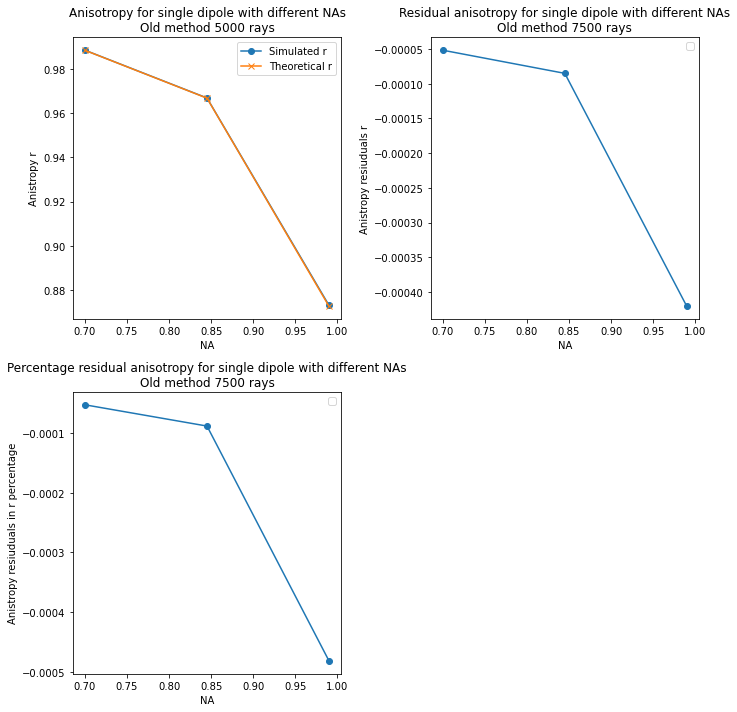

'\nfig.add_subplot(224)\n# compare area error to r error\narea_error = np.array(expected_areas) - np.array(ray_area)\nplt.scatter(area_error, np.array(r_theory_u)-np.array(r_u))\nplt.title("r residuals against ray area error")\nplt.tight_layout()\nplt.show()\n'

In [6]:

fig = plt.figure(figsize=[10,10])
fig.add_subplot(221)
plt.plot(NAs, r_u, linestyle=None, marker='o', label='Simulated r')
plt.plot(NAs, r_theory_u, linestyle=None, marker='x', label='Theoretical r')

plt.title("Anisotropy for single dipole with different NAs\nOld method 5000 rays")
plt.xlabel("NA")
plt.ylabel("Anistropy r")
plt.legend()

resid = np.array(r_theory_u)-np.array(r_u)
pc_resid = (np.array(r_theory_u)-np.array(r_u))/np.array(r_theory_u)

fig.add_subplot(222)
plt.title("Residual anisotropy for single dipole with different NAs\nOld method 7500 rays")
plt.xlabel("NA")
plt.ylabel("Anistropy resiuduals r")
plt.legend()
plt.plot(NAs, np.array(r_theory_u)-np.array(r_u), linestyle=None, marker='o', label='Residuals (theory minus simulation)')

fig.add_subplot(223)
plt.title("Percentage residual anisotropy for single dipole with different NAs\nOld method 7500 rays")
plt.xlabel("NA")
plt.ylabel("Anistropy resiuduals in r percentage")
plt.legend()
plt.plot(NAs, pc_resid, linestyle=None, marker='o', label='Residuals (theory minus simulation)')
plt.tight_layout()
plt.show()
"""
fig.add_subplot(224)
# compare area error to r error
area_error = np.array(expected_areas) - np.array(ray_area)
plt.scatter(area_error, np.array(r_theory_u)-np.array(r_u))
plt.title("r residuals against ray area error")
plt.tight_layout()
plt.show()
"""
# fig.add_subplot(424)
# area_error = (np.array(expected_areas) - np.array(ray_area))/np.array(expected_areas)
# plt.plot(NAs, area_error)
# plt.title("pc ray area error (A_i method)")
# plt.ylabel("Percentage error in expected and measured area")
# plt.show()

# fig.add_subplot(425)
# # then compare area error not just from NA not being perfect
# area_error_NA = np.array(expected_areas_NA_corrected) - np.array(ray_area)
# plt.plot(area_error_NA)
# plt.title("ray area error compared to the actual NA")
# plt.show()

# fig.add_subplot(425)
# area_error_manual = np.array(expected_areas) - np.array(ray_areas_manual)
# plt.plot(area_error_manual)
# plt.title("ray area error (manual method)")
# plt.show()

# fig.add_subplot(426)
# area_error_manual_NA = np.array(expected_areas_NA_corrected) - np.array(ray_areas_manual)
# plt.plot(area_error_manual_NA)
# plt.title("ray area error (manual method) compared to actual NA")
# plt.show()

# fig.add_subplot(425)
# area_error_manual_subtract = np.array(ray_area) - np.array(ray_areas_manual)
# plt.plot(area_error_manual_subtract)
# plt.title("ray area minus manual area")
# plt.show()


#fig.subplots_adjust()




# compare NA error to area error

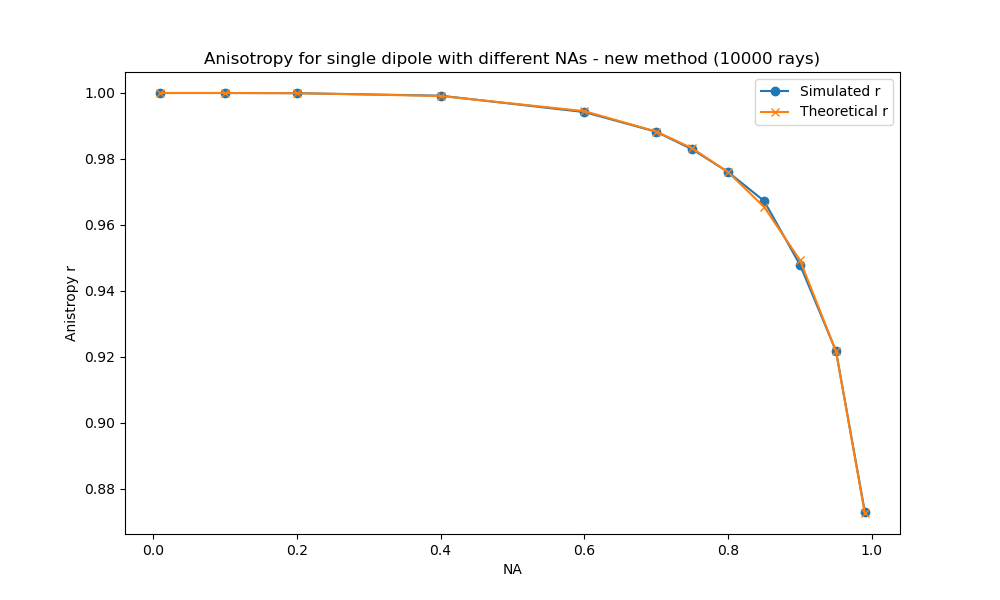

No handles with labels found to put in legend.


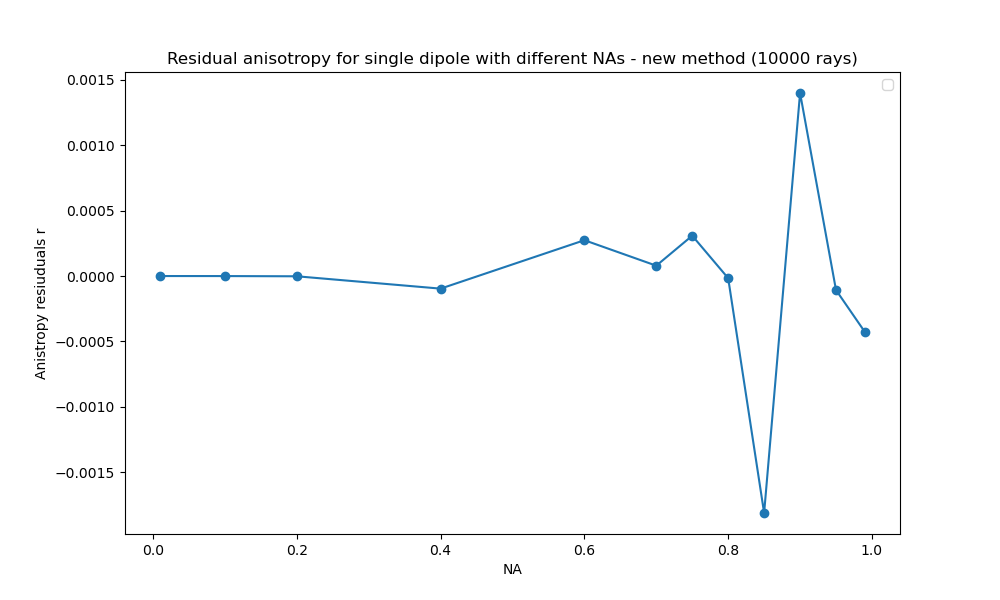

In [2]:
fig = plt.figure(figsize=[10,6])

plt.plot(NAs, r_u, linestyle=None, marker='o', label='Simulated r')
plt.plot(NAs, r_theory_u, linestyle=None, marker='x', label='Theoretical r')

plt.title("Anisotropy for single dipole with different NAs - new method (10000 rays)")
plt.xlabel("NA")
plt.ylabel("Anistropy r")
plt.legend()
plt.show()

fig = plt.figure(figsize=[10,6])
plt.title("Residual anisotropy for single dipole with different NAs - new method (10000 rays)")
plt.xlabel("NA")
plt.ylabel("Anistropy resiuduals r")
plt.legend()
plt.plot(NAs, np.array(r_theory_u)-np.array(r_u), linestyle=None, marker='o', label='Residuals (theory minus simulation)')
plt.show()

In [ ]:
#plt.figure()
#plt.subplot()

#TODO add subplots and save

# compare area error to r error
area_error = np.array(expected_areas) - np.array(ray_area)
print(area_error)
plt.figure()
plt.scatter(area_error, np.array(r_theory_u)-np.array(r_u))
plt.title("r residuals against ray area error")
plt.show()

# then compare area error not just from NA not being perfect
plt.figure()

area_error_NA = (np.array(expected_areas_NA_corrected) - np.array(ray_area))/np.array(expected_areas_NA_corrected)
plt.plot(area_error_NA)
plt.title("unexplained pc area error")
plt.show()

plt.figure()
area_error_NA = (np.array(expected_areas) - np.array(ray_area))/np.array(expected_areas)
plt.plot(area_error_NA)
plt.title("pc area error")
plt.show()

plt.figure()

area_error_NA = (np.array(expected_areas) - np.array(ray_area))
plt.plot(area_error_NA)
plt.title("area error")
plt.show()

plt.figure()

area_error_NA = (np.array(expected_areas_NA_corrected) - np.array(ray_area))
plt.plot(area_error_NA)
plt.title("unexplained  area error")
plt.show()


fig = plt.figure(figsize=[10,6])

plt.plot(NAs, r_u, linestyle=None, marker='o', label='Simulated r')
plt.plot(NAs, r_theory_u, linestyle=None, marker='x', label='Theoretical r')

In [1]:
import optical_systems
import dipole_source
import time

collection_NA = 0.95
# collection_NA = 0.0001
collection_f = 0.005
# collection_f = 0.15
excitation_polarisation = (0,0)

method='uniform_phi_inbetween'

r_theory = []
r = []
NAs = [0.01, 0.1, 0.2, 0.4, 0.6, 0.8, 0.9, 0.95]
# NAs = [0.01, 0.3, 0.5, 0.8, 0.95]
# NAs = [0.75]
excitation_polarisation = (0, 0)

## ---- UNIFORM RAYS ---- ##
r_theory_u = []
r_u = []
start_new_rays = time.time()
for NA in NAs:
    excitation_polarisation = (0, 0)
    r_t, r_theory_t = optical_systems.compare_single_dipole_theory(NA, collection_f, excitation_polarisation, source=None,\
        processes=2, plot=True, rays_distribution='uniform_rings', binning_detector=True) #rays_distribution='uniform', binning_detector=True)
    r_u.append(r_t)
    r_theory_u.append(r_theory_t)
time_new_rays = time.time() - start_new_rays
print("with binning time %f", time_new_rays)

from matplotlib import pyplot as plt
import numpy as np

fig = plt.figure(figsize=[10,6])

plt.plot(NAs, r_u, linestyle=None, marker='o', label='Simulated r')
plt.plot(NAs, r_theory_u, linestyle=None, marker='x', label='Theoretical r')

plt.title("Anisotropy for single dipole with different NAs UNIFORM RAYS - New method")
plt.xlabel("NA")
plt.ylabel("Anistropy r")
plt.legend()
plt.show()

## ---- UNIFORM RAYS ---- ## -- old anisotropy method
r_theory_u = []
r_u = []
start_new_rays = time.time()
for NA in NAs:
    excitation_polarisation = (0, 0)
    r_t, r_theory_t = optical_systems.compare_single_dipole_theory(NA, collection_f, excitation_polarisation, source=None,\
        processes=2, plot=True, rays_distribution=None, binning_detector=False) #rays_distribution='uniform', binning_detector=True)
    r_u.append(r_t)
    r_theory_u.append(r_theory_t)
time_new_rays = time.time() - start_new_rays
print("with binning time %f", time_new_rays)

fig = plt.figure(figsize=[10,6])

plt.plot(NAs, r_u, linestyle=None, marker='o', label='Simulated r')
plt.plot(NAs, r_theory_u, linestyle=None, marker='x', label='Theoretical r')

plt.title("Anisotropy for single dipole with different NAs UNIFORM RAYS")
plt.xlabel("NA")
plt.ylabel("Anistropy r")
plt.legend()
plt.show()

Generating 1 dipoles
Dipole: theta=0.0, phi_d=0.0
127
127
NA is about 0.027066890632880293
voronoi area sum 12.56574230630071
target expected area 0.00031416711973326493
expected area, actual NA 0.002302004528514077
Tracing with 2 CPU processes
Flat pupil
Time elapsed in parallel section (time.time()) 2.603575s
lengths phi, rad, data 8 8 8
Time elapsed in bin section (time.time()) 0.000940s
[0.00062833 0.00060154 0.00060154 0.00060154 0.00060154 0.00060154
 0.00060154 0.00060154]
total area of elements (curved) 0.004839104768011106
total_area_flat 0.004839104757484693
Time elapsed in addition 0.328125s
----------------------------------
----------------------------------
127
127
NA is about 0.027066890632880293
voronoi area sum 12.56574230630071
target expected area 0.00031416711973326493
expected area, actual NA 0.002302004528514077
Tracing with 2 CPU processes
Flat pupil
Time elapsed in parallel section (time.time()) 2.136616s
lengths phi, rad, data 8 8 8
Time elapsed in bin section 

ValueError: too many values to unpack (expected 2)

In [1]:
import optical_systems
import dipole_source
import time

collection_NA = 0.95
# collection_NA = 0.0001
collection_f = 0.005
# collection_f = 0.15
excitation_polarisation = (0,0)

method='uniform_phi_inbetween'

r_theory = []
r = []
NAs = [0.01, 0.1, 0.2, 0.4, 0.6, 0.8, 0.9, 0.95]
#NAs = [0.01, 0.3, 0.5, 0.8, 0.95]
NAs = [0.95]
excitation_polarisation = (0, 0)


start_original = time.time()
for NA in NAs:
    excitation_polarisation = (0, 0)
    r_t, r_theory_t = optical_systems.compare_single_dipole_theory(NA, collection_f, excitation_polarisation, source=None,\
        processes=2, plot=True, rays_distribution=None, binning_detector=False)
    r.append(r_t)
    r_theory.append(r_theory_t)
time_original = time.time() - start_original
print("original rays time %f", time_original)

from matplotlib import pyplot as plt
import numpy as np

fig = plt.figure(figsize=[10,6])

plt.plot(NAs, r, linestyle=None, marker='o', label='Simulated r')
plt.plot(NAs, r_theory, linestyle=None, marker='x', label='Theoretical r' )

plt.title("Anisotropy for single dipole with different NAs")
plt.xlabel("NA")
plt.ylabel("Anistropy r")
plt.legend()

## ---- UNIFORM RAYS ---- ##
r_theory_u = []
r_u = []
start_new_rays = time.time()
for NA in NAs:
    excitation_polarisation = (0, 0)
    r_t, r_theory_t = optical_systems.compare_single_dipole_theory(NA, collection_f, excitation_polarisation, source=None,\
        processes=2, plot=True, rays_distribution='uniform_rings', binning_detector=True) #rays_distribution='uniform', binning_detector=True)
    r_u.append(r_t)
    r_theory_u.append(r_theory_t)
time_new_rays = time.time() - start_new_rays
print("with binning time %f", time_new_rays)

from matplotlib import pyplot as plt
import numpy as np

fig = plt.figure(figsize=[10,6])

plt.plot(NAs, r_u, linestyle=None, marker='o', label='Simulated r')
plt.plot(NAs, r_theory_u, linestyle=None, marker='x', label='Theoretical r')

plt.title("Anisotropy for single dipole with different NAs UNIFORM RAYS")
plt.xlabel("NA")
plt.ylabel("Anistropy r")
plt.legend()

Generating 1 dipoles
Dipole: theta=0.0, phi_d=0.0
Tracing with 2 CPU processes
Curved pupil
Time elapsed in parallel section (time.time()) 5.720801s
Time elapsed in addition 1.546875s
----------------------------------
----------------------------------
Tracing with 2 CPU processes
Curved pupil
Time elapsed in parallel section (time.time()) 4.802913s
Time elapsed in addition 1.859375s
----------------------------------
----------------------------------
Graphical Anisotropy r = 0.9229141894726055
alpha: 0
phi: 0
Theoretical anisotropy r = 0.9216541179239064
theory intensities 0.9838264837495119 0.02710882791650399


ValueError: too many values to unpack (expected 2)

[-0.00197672  0.00335323  0.00796913 -0.01318786 -0.01302513 -0.0103472
 -0.00669502  0.00531619  0.02126712 -0.02902956 -0.00051364  0.04046433
  0.00333869 -0.02736103 -0.04000735 -0.02416528  0.04116801  0.05131802
  0.06654248 -0.02169089]


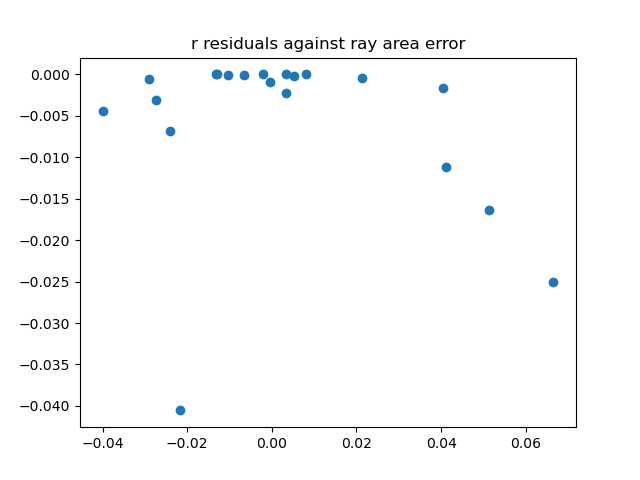

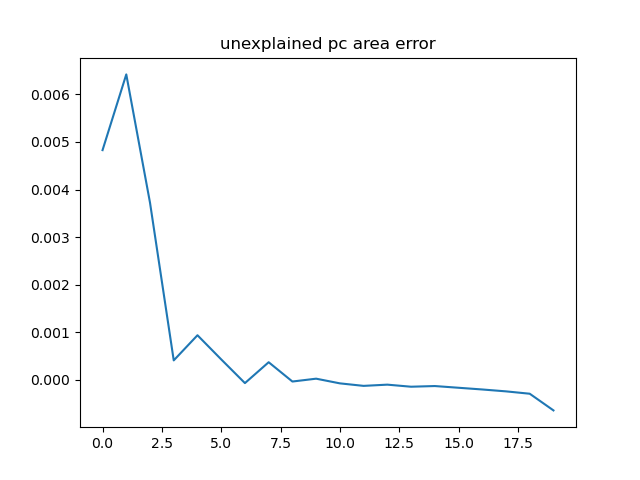

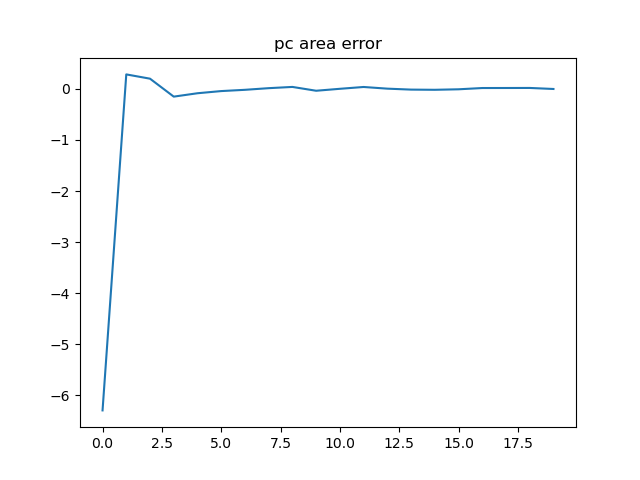

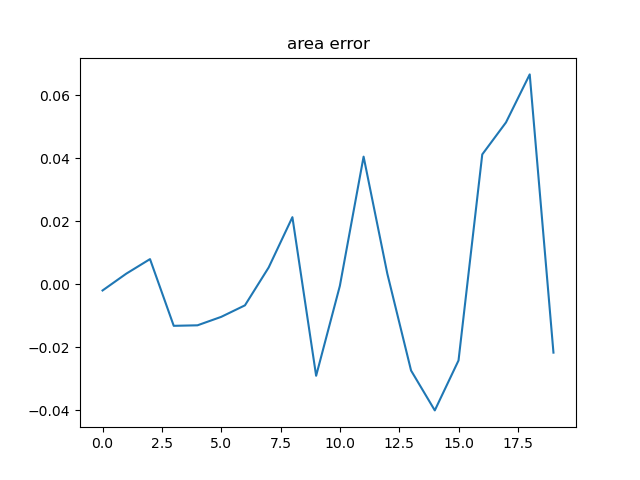

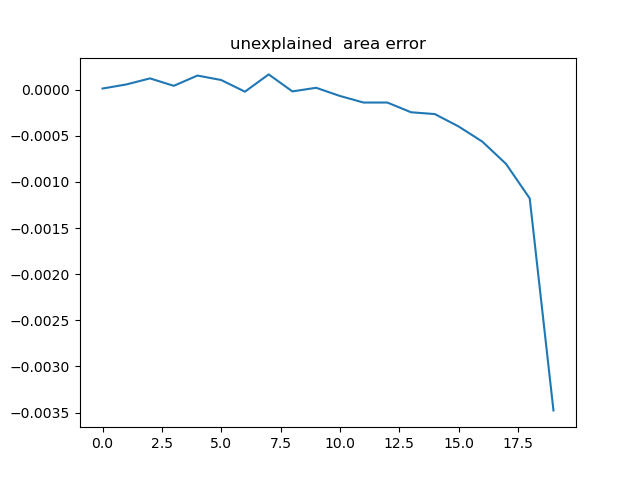

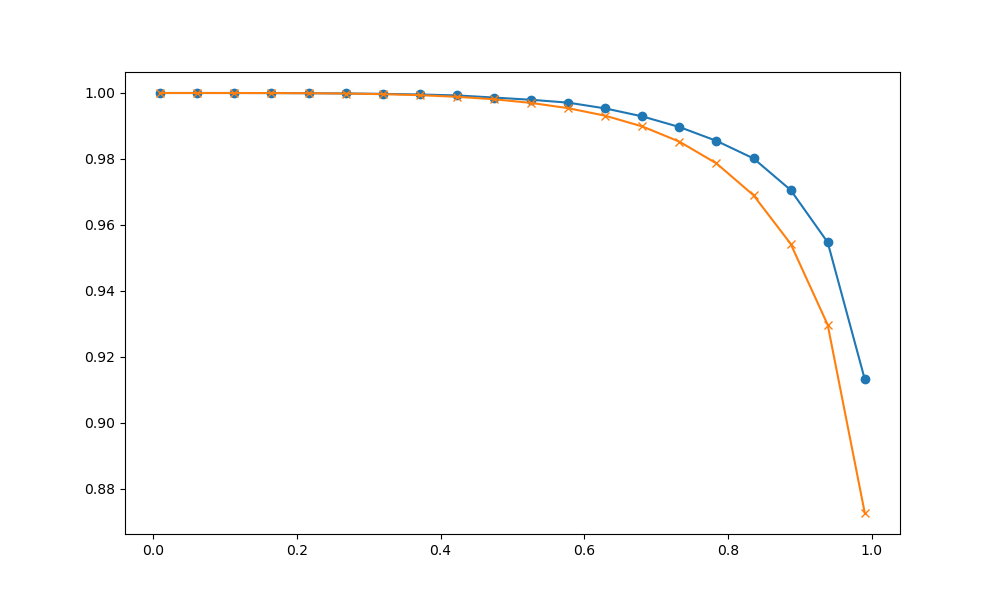